### Curve fitting (cubic)  

#### Import libraries  

In [1]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#### Parameters  

In [2]:
csv_in = 'dm-end2-5.csv'
%config InlineBackend.figure_formats = {'png', 'retina'}

#### Read data to be fitted from CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(100, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


,x,y
0,6.54,-0.197
1,1.15,0.637
2,9.50,-0.381
3,4.82,-0.311
4,8.72,0.162


#### Scatter plot of data  

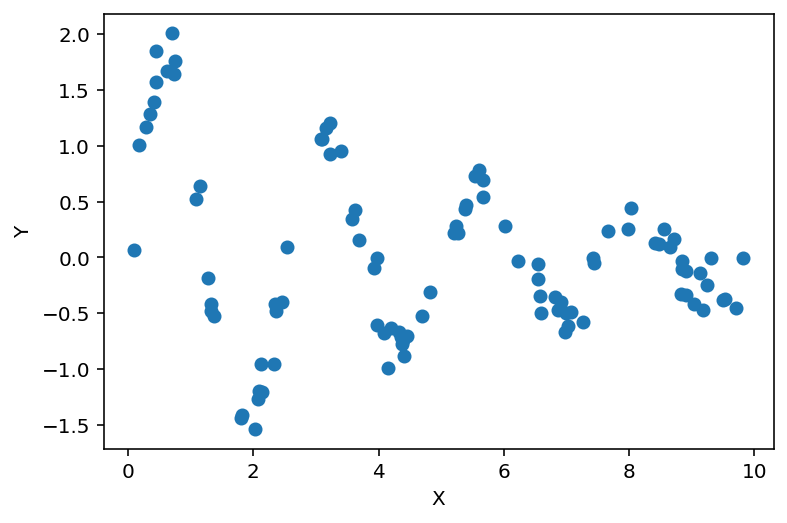

In [4]:
plt.scatter(df['x'],df['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Definition of function for fitting  

In [5]:
def f(x, a, b, c):
    tot = a * np.exp(-b * x) * np.sin(c*x)
    return tot

#### Execute fitting  

In [6]:
popt, pcov = curve_fit(f, df['x'], df['y'])

In [7]:
print(popt)

[2.04346472 0.20491946 2.49641912]


In [8]:
y_reg = f(df['x'], *popt)  # *var: unpacking of list/tuple var

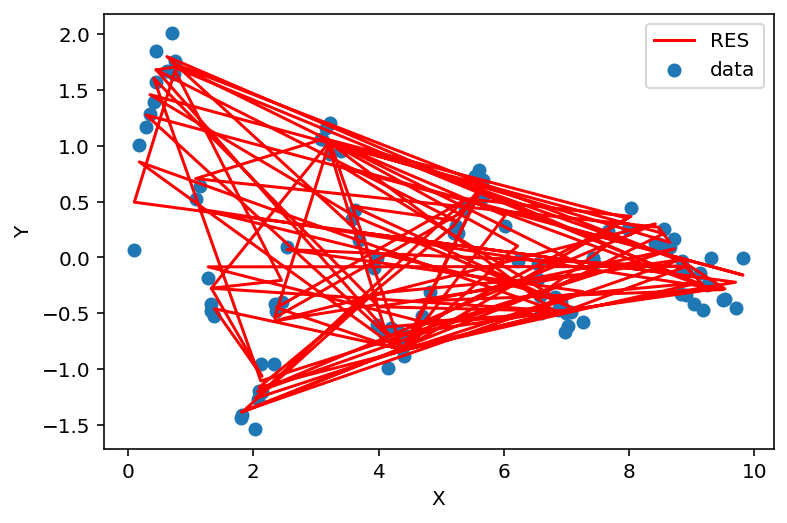

In [9]:
plt.scatter(df['x'], df['y'], label='data')
lbl = 'RES'
plt.plot(df['x'], y_reg, color='red', label=lbl)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()